In [1]:
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words = vocab_size)

In [3]:
max_len = 200
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [5]:
embedding_dim = 256
batch_size = 256

In [6]:
model = Sequential()
model.add(Embedding(vocab_size, 256))
model.add(Dropout(0.3))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [7]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [8]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test), callbacks=[es, mc])

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
24992/25000 [============================>.] - ETA: 0s - loss: 0.4185 - acc: 0.7949
Epoch 00001: val_acc improved from -inf to 0.88036, saving model to best_model.h5
25000/25000 [==============================] - 176s 7ms/sample - loss: 0.4185 - acc: 0.7949 - val_loss: 0.2840 - val_acc: 0.8804
Epoch 2/20
24992/25000 [============================>.] - ETA: 0s - loss: 0.2166 - acc: 0.9154
Epoch 00002: val_acc improved from 0.88036 to 0.88752, saving model to best_model.h5
25000/25000 [==============================] - 174s 7ms/sample - loss: 0.2165 - acc: 0.9154 - val_loss: 0.2605 - val_acc: 0.8875
Epoch 3/20
24992/25000 [============================>.] - ETA: 0s - loss: 0.1101 - acc: 0.9612
Epoch 00003: val_acc did not improve from 0.88752
25000/25000 [==============================] - 182s 7ms/sample - loss: 0.1101 - acc: 0.9612 - val_loss: 0.3132 - val_acc: 0.8842
Epoch 4/20
24992/25000 [============================>.] - ETA

In [10]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


 테스트 정확도: 0.8875


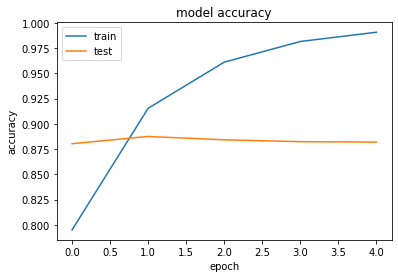

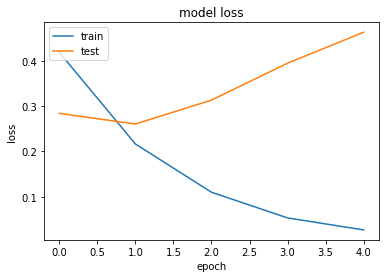

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
## summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()